<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data" data-toc-modified-id="Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data</a></span><ul class="toc-item"><li><span><a href="#Project-description" data-toc-modified-id="Project-description-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Project description</a></span></li><li><span><a href="#Data-description" data-toc-modified-id="Data-description-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data description</a></span></li><li><span><a href="#Library-imports-and-project-environment-setup" data-toc-modified-id="Library-imports-and-project-environment-setup-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Library imports and project environment setup</a></span></li><li><span><a href="#CSV-file-read" data-toc-modified-id="CSV-file-read-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>CSV file read</a></span></li><li><span><a href="#General-info-and-preprocessing" data-toc-modified-id="General-info-and-preprocessing-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>General info and preprocessing</a></span></li></ul></li><li><span><a href="#Task-1:-Similar-customers" data-toc-modified-id="Task-1:-Similar-customers-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Task 1: Similar customers</a></span></li><li><span><a href="#Task-2:-Insurance-benefit-prediction-kNN" data-toc-modified-id="Task-2:-Insurance-benefit-prediction-kNN-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Task 2: Insurance benefit prediction kNN</a></span><ul class="toc-item"><li><span><a href="#Unscaled" data-toc-modified-id="Unscaled-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Unscaled</a></span></li><li><span><a href="#Scaled" data-toc-modified-id="Scaled-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Scaled</a></span></li><li><span><a href="#Paying-insurance-benefit-probability" data-toc-modified-id="Paying-insurance-benefit-probability-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Paying insurance benefit probability</a></span></li></ul></li><li><span><a href="#Task-3:-Insurance-benefit-prediction--LR" data-toc-modified-id="Task-3:-Insurance-benefit-prediction--LR-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Task 3: Insurance benefit prediction- LR</a></span></li><li><span><a href="#Task-4:-Data-obfuscation" data-toc-modified-id="Task-4:-Data-obfuscation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Task 4: Data obfuscation</a></span><ul class="toc-item"><li><span><a href="#Proof-data-obfuscation-works-with-LR" data-toc-modified-id="Proof-data-obfuscation-works-with-LR-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Proof data obfuscation works with LR</a></span></li><li><span><a href="#LR-testing-with-data-obfuscation" data-toc-modified-id="LR-testing-with-data-obfuscation-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>LR testing with data obfuscation</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Data

## Project description

Sure Tomorrow insurance company wants to solve several tasks with machine learning and we are asked to evaluate that possibility.

It's necessary to develop a data transformation algorithm that would make it hard to recover personal information if data fell into wrong hands. This is called data masking, or data obfuscation. But data should be protected in such a way that machine learning models' quality  doesn't suffer. We don't need to pick best model, just prove algorithm works correctly.

## Data description

- __Features__: insured person's gender, age, salary, and number of family
members.
- __Target__: number of insurance benefits received by the insured person over the last five years.

## Library imports and project environment setup

In [1]:
##Pandas, Numpy and Re for data preprocessing and manipulation
import pandas as pd
import numpy as np
import re

##Remove warnings
import sys
import warnings
if not sys.warnoptions:
   warnings.simplefilter("ignore");

##Math
import math

##Matplotlib and Seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns
#from IPython.display import display

#SKLearn for ML
import sklearn.linear_model
import sklearn.metrics
from sklearn.model_selection import train_test_split
import sklearn.neighbors
import sklearn.preprocessing
from scipy.spatial import distance

## CSV file read

In [2]:
#Reading csv file using try-except to handle unexpected errors
try:
    df=pd.read_csv('/Downloads/insurance_us.csv')

except:
    df=pd.read_csv('https://code.s3.yandex.net/datasets/insurance_us.csv')

## General info and preprocessing

In [3]:
#First, in order to guarantee efficiency we immediately drop row-based duplicates
df.drop_duplicates(inplace=True,keep='last')
df.reset_index(drop=True, inplace=True)

#Printing first five entries in dataframe
df.head()

,Gender,Age,Salary,Family members,Insurance benefits
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,1,28.0,26100.0,0,0
4,1,43.0,41000.0,2,1


- Results show column names are accurate to the project data description.
- DF has 4 features and `Insurance benefits` as it's categorical target.
- Column names should be converted to lowercase and spaces removed.

In [4]:
#General file examination (missing values and data types)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4847 entries, 0 to 4846
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              4847 non-null   int64  
 1   Age                 4847 non-null   float64
 2   Salary              4847 non-null   float64
 3   Family members      4847 non-null   int64  
 4   Insurance benefits  4847 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 189.5 KB


- Dataset includes 4847 entries and 5 columns.
- There aren't any missing values.
- `Age` data type should be converted to integer.

In [5]:
#Integrated display of columns
df.describe(include='all')

,Gender,Age,Salary,Family members,Insurance benefits
count,4847.000000,4847.000000,4847.000000,4847.000000,4847.000000
mean,0.498453,31.023932,39895.811842,1.203425,0.152259
std,0.500049,8.487995,9972.953985,1.098664,0.468934
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33200.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


- Both `Gender` values are represented equally.
- `Age` and `Salary` seem normally distributed with close mean and median values. 
- Avg. age is 30 years old and avg. salary is $40.2K.
- `Family members` up to 6 and normally distributed.
- Most insured people didn't receive insurance benefits over the last five years. 
- Target has max value of 5.

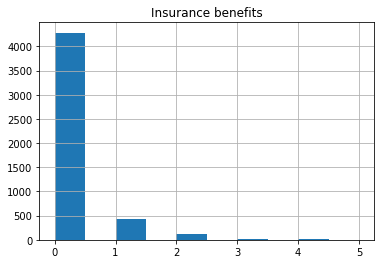

In [6]:
#Plotting insurance benefits
df['Insurance benefits'].hist()
plt.title('Insurance benefits');

Target classes are imbalanced.

In [7]:
#Replacing column names
columns = []
for name in df.columns.values:
    name = re.sub('([A-Z])', r' \1', name).lower().replace(' ', '_')[1:]
    columns.append(name)

df.columns = columns
df.head(0)

,gender,age,salary,family_members,insurance_benefits


In [8]:
#Converting data type
df['age'] = df['age'].astype(int)

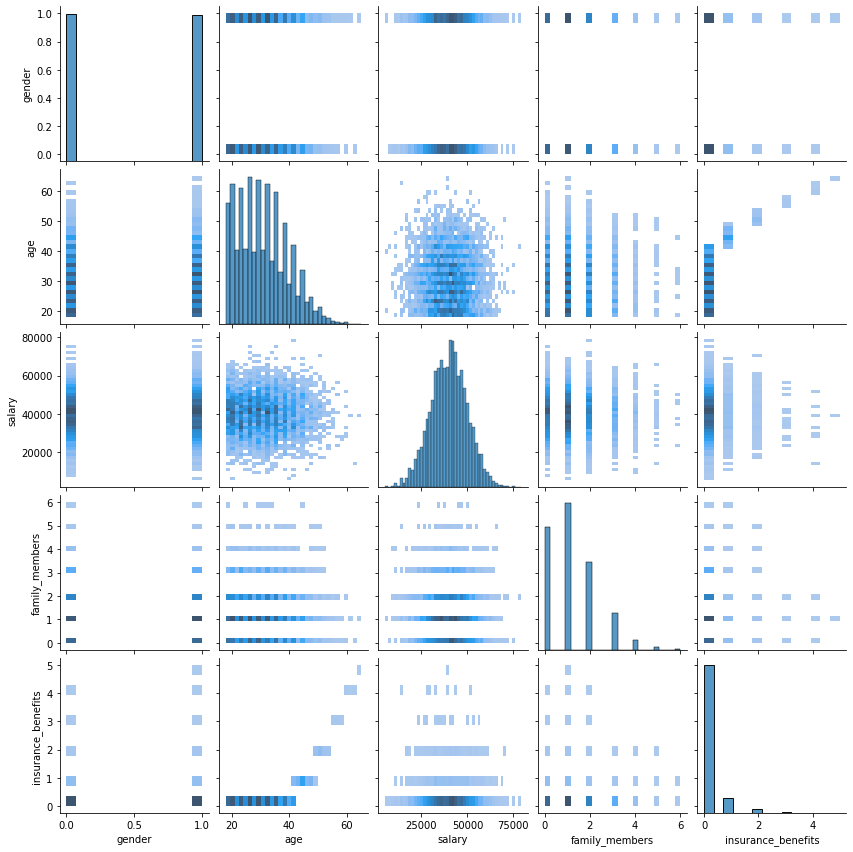

In [9]:
#Plotting pair plot to check whether there are any customer groups
sns.pairplot(df, kind='hist').fig.set_size_inches(12, 12);

There aren't any obvious groups (clusters) as it is difficult to combine several variables simultaneously (to analyze multivariate distributions). Now, on to LA and ML.

# Task 1: Similar customers

In [10]:
#Saving feature names
feature_names = ['gender', 'age', 'salary', 'family_members']

#Defining function to return k nearest neighbors for given object based on specified distance metric
def get_knn(df, n, k, metric):
    
    """ Returns k nearest neighbors
    
    :param df: pandas DataFrame used to find similar objects within
    :param n: object no for which the nearest neighbours are looked for
    :param k: the number of the nearest neighbours to return
    :param metric: name of distance metric"""

    nbrs = sklearn.neighbors.NearestNeighbors(n_neighbors=k, metric=metric) 
    nbrs.fit(df[feature_names].values)
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)
    
    df_res = pd.concat([df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])], axis=1)
    
    return df_res

#Scaling
transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())
df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())
df_scaled.sample(5)

,gender,age,salary,family_members,insurance_benefits
3124,1.0,0.446154,0.344304,0.500000,0
2315,0.0,0.384615,0.594937,0.166667,0
1992,1.0,0.384615,0.297468,0.000000,0
1064,0.0,0.538462,0.398734,0.166667,0
3375,0.0,0.446154,0.631646,0.333333,0


In [11]:
#Getting similar records to given one for every combination

#Euclidean- unscaled data
get_knn(df[feature_names], 0, 10, distance.euclidean)

,gender,age,salary,family_members,distance
0,1,41,49600.0,1,0.000000
1915,1,41,49600.0,0,1.000000
1149,0,42,49600.0,0,1.732051
3882,1,44,49600.0,2,3.162278
3280,0,38,49600.0,0,3.316625
761,1,37,49600.0,2,4.123106
4508,0,45,49600.0,0,4.242641
2017,0,37,49600.0,2,4.242641
2230,1,46,49600.0,2,5.099020
3754,1,36,49600.0,0,5.099020


In [12]:
#Euclidean- scaled data
get_knn(df_scaled[feature_names], 0, 10, distance.euclidean)

,gender,age,salary,family_members,distance
0,1.0,0.630769,0.627848,0.166667,0.000000
2562,1.0,0.630769,0.634177,0.166667,0.006329
119,1.0,0.615385,0.636709,0.166667,0.017754
4716,1.0,0.646154,0.637975,0.166667,0.018418
3133,1.0,0.646154,0.651899,0.166667,0.028550
1473,1.0,0.615385,0.602532,0.166667,0.029624
3222,1.0,0.630769,0.596203,0.166667,0.031646
110,1.0,0.661538,0.635443,0.166667,0.031693
3491,1.0,0.615385,0.600000,0.166667,0.031815
3031,1.0,0.600000,0.611392,0.166667,0.034893


In [13]:
#Manhattan- unscaled data
get_knn(df[feature_names], 0, 10, distance.cityblock)

,gender,age,salary,family_members,distance
0,1,41,49600.0,1,0.0
1915,1,41,49600.0,0,1.0
1149,0,42,49600.0,0,3.0
3882,1,44,49600.0,2,4.0
761,1,37,49600.0,2,5.0
3280,0,38,49600.0,0,5.0
3754,1,36,49600.0,0,6.0
2230,1,46,49600.0,2,6.0
4508,0,45,49600.0,0,6.0
2017,0,37,49600.0,2,6.0


In [14]:
#Manhattan- scaled data
get_knn(df_scaled[feature_names], 0, 10, distance.cityblock)

,gender,age,salary,family_members,distance
0,1.0,0.630769,0.627848,0.166667,0.000000
2562,1.0,0.630769,0.634177,0.166667,0.006329
119,1.0,0.615385,0.636709,0.166667,0.024245
4716,1.0,0.646154,0.637975,0.166667,0.025511
3222,1.0,0.630769,0.596203,0.166667,0.031646
110,1.0,0.661538,0.635443,0.166667,0.038364
4152,1.0,0.630769,0.588608,0.166667,0.039241
3133,1.0,0.646154,0.651899,0.166667,0.039435
1473,1.0,0.615385,0.602532,0.166667,0.040701
3491,1.0,0.615385,0.600000,0.166667,0.043233


**Does unscaled data affect kNN algorithm? If so, how does that appear?** 
Unscaled data affects kNN algorithm because algorithm gives more importance to features with higher ranging numbers. 

Euclidean distance: 
    - Unscaled- ranges from 0 to 5.099. 
    - Scaled- ranges from 0 to 0.034.
    
Scaled data results in more comparable distances.

**How similar are Manhattan distance results?** 
Only 1st result is identical when applying Manhattan distance metric (0) and the rest are different.

# Task 2: Insurance benefit prediction kNN

In [15]:
#Defining evaluation function
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Confusion Matrix')
    print(cm)

#Generating random model output
def rnd_model_predict(P, size, seed=42):
    
    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

## Unscaled

In [16]:
#Finding target of insurance_benefits over zero- unscaled data
df['insurance_benefits_received'] = (df['insurance_benefits'] > 0).astype(int)

#Taking another look at class imbalance using value_counts()
df['insurance_benefits_received'].value_counts()

0    4284
1     563
Name: insurance_benefits_received, dtype: int64

In [17]:
#Splitting unscaled data into train and test sets (X- features, y-target)
train, test = train_test_split(df, test_size=0.3, stratify=df['insurance_benefits_received'], random_state=12345)

X_train = train[feature_names]
X_test = test[feature_names]
y_train = train['insurance_benefits_received']
y_test = test['insurance_benefits_received']

#Measuring model quality with F1 metric for k=1..10- unscaled data
f1_unscaled = []
for k in range(1,11):
    knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)
    f1_score = sklearn.metrics.f1_score(y_test, knn_pred)
    f1_unscaled.append(f1_score)
    print(f'n_neighbors: {k}, F1: {f1_score:.2f}')    

n_neighbors: 1, F1: 0.64
n_neighbors: 2, F1: 0.43
n_neighbors: 3, F1: 0.43
n_neighbors: 4, F1: 0.22
n_neighbors: 5, F1: 0.25
n_neighbors: 6, F1: 0.09
n_neighbors: 7, F1: 0.10
n_neighbors: 8, F1: 0.07
n_neighbors: 9, F1: 0.09
n_neighbors: 10, F1: 0.01


*k* influences evaluation metrics- mostly, the higher *k* is, F1 score is lower.
Highest F1 score is 0.65 when *k*=1.

## Scaled

In [18]:
#Finding target of insurance_benefits over zero- scaled data
df_scaled['insurance_benefits_received'] = (df_scaled['insurance_benefits'] > 0).astype(int)

#Splitting scaled data into train and test sets (X- features, y-target)
train_scaled, test_scaled = train_test_split(df_scaled, test_size=0.3, stratify=df_scaled['insurance_benefits_received'], random_state=12345)

X_train_scaled = train_scaled[feature_names]
X_test_scaled = test_scaled[feature_names]
y_train_scaled = train_scaled['insurance_benefits_received']
y_test_scaled = test_scaled['insurance_benefits_received']

#Measuring model quality with F1 metric for k=1..10- scaled data
f1_scaled = []
for k in range(1,11):
    knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train_scaled)
    knn_pred = knn.predict(X_test_scaled)
    f1_score = sklearn.metrics.f1_score(y_test_scaled, knn_pred)
    f1_scaled.append(f1_score)
    print(f'n_neighbors: {k}, F1: {f1_score:.2f}')    

n_neighbors: 1, F1: 0.94
n_neighbors: 2, F1: 0.92
n_neighbors: 3, F1: 0.94
n_neighbors: 4, F1: 0.90
n_neighbors: 5, F1: 0.94
n_neighbors: 6, F1: 0.92
n_neighbors: 7, F1: 0.94
n_neighbors: 8, F1: 0.92
n_neighbors: 9, F1: 0.93
n_neighbors: 10, F1: 0.91


*k* slightly influences evaluation metrics, but it's inconsistent.
Highest F1 score is 0.94 when *k*=1/3/5/7.

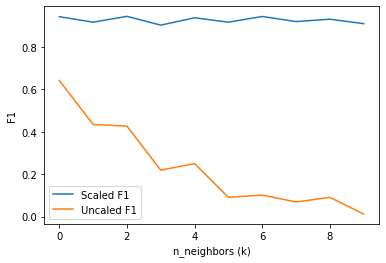

In [19]:
#Plotting 
plt.figure()
plt.plot(f1_scaled, label = "Scaled F1")
plt.plot(f1_unscaled, label = 'Uncaled F1')
plt.xlabel('n_neighbors (k)')
plt.ylabel('F1')
plt.legend()
plt.show()

Plot depicts higher and more stable F1 scores for scaled data while unscaled decrease.

## Paying insurance benefit probability 

Paying any insurance benefit probability:

$$P\{\text{insurance benefit received}\}=\frac{\text{number of clients received any insurance benefit}}{\text{total number of clients}}.$$

In [20]:
#Finding confusion matrix and F1 of dummy rnd_model predictions- unscaled data
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:

    print(f'Probability: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P, df.shape[0])
        
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    
    print()

Probability: 0.00
F1: 0.00
Confusion Matrix
[[0.88384568 0.        ]
 [0.11615432 0.        ]]

Probability: 0.12
F1: 0.11
Confusion Matrix
[[0.78295853 0.10088715]
 [0.10377553 0.01237879]]

Probability: 0.50
F1: 0.18
Confusion Matrix
[[0.44749329 0.43635238]
 [0.06044976 0.05570456]]

Probability: 1.00
F1: 0.21
Confusion Matrix
[[0.         0.88384568]
 [0.         0.11615432]]



In [21]:
#Finding confusion matrix and F1 of dummy rnd_model predictions- scaled data
for P in [0, df_scaled['insurance_benefits_received'].sum() / len(df_scaled), 0.5, 1]:

    print(f'Probability: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P, df_scaled.shape[0])
        
    eval_classifier(df_scaled['insurance_benefits_received'], y_pred_rnd)
    
    print()

Probability: 0.00
F1: 0.00
Confusion Matrix
[[0.88384568 0.        ]
 [0.11615432 0.        ]]

Probability: 0.12
F1: 0.11
Confusion Matrix
[[0.78295853 0.10088715]
 [0.10377553 0.01237879]]

Probability: 0.50
F1: 0.18
Confusion Matrix
[[0.44749329 0.43635238]
 [0.06044976 0.05570456]]

Probability: 1.00
F1: 0.21
Confusion Matrix
[[0.         0.88384568]
 [0.         0.11615432]]



Highest F1 score of 0.21 when P=1 for both unscaled and scaled data.

# Task 3: Insurance benefit prediction- LR

- $X$ — feature matrix, each row is a case, each column is a feature, the first column consists of unities
- $y$ — target (a vector)
- $\hat{y}$ — estimated tagret (a vector)
- $w$ — weight vector

Linear regression task in matrices' language can be formulated as: $$y = Xw$$

Training objective is finding $w$ to minimize L2-distance (MSE) between $Xw$ and $y$:

$$\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)$$

Analytical solution for above to find weights $w$: $$w = (X^T X)^{-1} X^T y$$

Formula to calculate predicted values:
$$\hat{y} = X_{val}w$$

In [22]:
#Building implementation of LR
class MyLinearRegression:
    
    def __init__(self):
        self.weights = None
    
    def fit(self, X, y):
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        self.weights = np.linalg.inv(X2.T.dot(X2)).dot(X2.T).dot(y)

    def predict(self, X):
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        y_pred = X2.dot(self.weights)
        return y_pred

#Defining evaluation function
def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')

In [23]:
#Linear regression- unscaled data
X = df[['age', 'gender', 'salary', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-9.44297084e-01  3.57250600e-02  2.62226896e-04  1.65512162e-08
 -1.54743916e-02]
RMSE: 0.36
R2: 0.67


In [24]:
#Linear regression- scaled data
X = df_scaled[['age', 'gender', 'salary', 'family_members']].to_numpy()
y = df_scaled['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-9.44297084e-01  2.32212890e+00  2.62226896e-04  1.30754608e-03
 -9.28463493e-02]
RMSE: 0.36
R2: 0.67


RMSE=0.36 and R2=0.67 for both unscaled and scaled data, meaning on a scale from 0 to 1 model prediction mistakes are 36% and R2 score in a range of 100 returns 67%.
Scaled data results in more interpretable trained model weights than unscaled data.

# Task 4: Data obfuscation

It's best to obfuscate data by multiplying numerical features (matrix $X$) by an invertible matrix $P$. 

$$X' = X \times P$$

In [25]:
#Creating DF of 4 features as columns
personal_info_column_list = ['gender', 'age', 'salary', 'family_members']
df_pn = df[personal_info_column_list]

#Generating matrix X
X = df_pn.to_numpy()

#Generating random matrix P
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

#Checking if matrix P is invertible
np.matmul(P, np.linalg.inv(P))

array([[ 1.00000000e+00, -1.66533454e-16,  0.00000000e+00,
         8.32667268e-17],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         6.93889390e-17],
       [ 0.00000000e+00, -1.11022302e-16,  1.00000000e+00,
         6.93889390e-17],
       [-2.28983499e-16, -3.88578059e-16, -5.55111512e-17,
         1.00000000e+00]])

P is invertible since there are 1s in diagonal. 

In [26]:
#Transforming (obfuscating data) to see if possible to guess customers' ages or salary after transformation
X_prime = np.matmul(X, P)
X_prime

array([[ 6359.71527314, 22380.40467609, 18424.09074184, 46000.69669016],
       [ 4873.29406479, 17160.36702982, 14125.78076133, 35253.45577301],
       [ 2693.11742928,  9486.397744  ,  7808.83156024, 19484.86063067],
       ...,
       [ 4346.2234249 , 15289.24126492, 12586.16264392, 31433.50888552],
       [ 4194.09324155, 14751.9910242 , 12144.02930637, 30323.88763426],
       [ 5205.46827354, 18314.24814446, 15077.01370762, 37649.59295455]])

DF numbers are no longer distinguishable nor recognizable.

In [27]:
#Moving P from formula's right side to left one to check if original data can be recovered from X' if P is known 
X_rec = X_prime.dot(np.linalg.inv(P))
display(X)
X_rec

array([[1.00e+00, 4.10e+01, 4.96e+04, 1.00e+00],
       [0.00e+00, 4.60e+01, 3.80e+04, 1.00e+00],
       [0.00e+00, 2.90e+01, 2.10e+04, 0.00e+00],
       ...,
       [0.00e+00, 2.00e+01, 3.39e+04, 2.00e+00],
       [1.00e+00, 2.20e+01, 3.27e+04, 3.00e+00],
       [1.00e+00, 2.80e+01, 4.06e+04, 1.00e+00]])

array([[ 1.00000000e+00,  4.10000000e+01,  4.96000000e+04,
         1.00000000e+00],
       [-3.18323146e-12,  4.60000000e+01,  3.80000000e+04,
         1.00000000e+00],
       [ 1.36424205e-12,  2.90000000e+01,  2.10000000e+04,
         0.00000000e+00],
       ...,
       [ 4.54747351e-13,  2.00000000e+01,  3.39000000e+04,
         2.00000000e+00],
       [ 1.00000000e+00,  2.20000000e+01,  3.27000000e+04,
         3.00000000e+00],
       [ 1.00000000e+00,  2.80000000e+01,  4.06000000e+04,
         1.00000000e+00]])

X is recoverable by multiplying obfuscated matrix by P inverse.

In [28]:
#Printing all three cases for a few customers
print('Original data \n {}'.format(X[:3]))
print()
print('Transformed data \n {}'.format(X_prime[:3]))
print()
print('Reversed (recovered) data \n {}'.format(X_rec[:3]))
print()

Original data 
 [[1.00e+00 4.10e+01 4.96e+04 1.00e+00]
 [0.00e+00 4.60e+01 3.80e+04 1.00e+00]
 [0.00e+00 2.90e+01 2.10e+04 0.00e+00]]

Transformed data 
 [[ 6359.71527314 22380.40467609 18424.09074184 46000.69669016]
 [ 4873.29406479 17160.36702982 14125.78076133 35253.45577301]
 [ 2693.11742928  9486.397744    7808.83156024 19484.86063067]]

Reversed (recovered) data 
 [[ 1.00000000e+00  4.10000000e+01  4.96000000e+04  1.00000000e+00]
 [-3.18323146e-12  4.60000000e+01  3.80000000e+04  1.00000000e+00]
 [ 1.36424205e-12  2.90000000e+01  2.10000000e+04  0.00000000e+00]]



Some values aren't exactly same as in original data, this may be due to precision of calculation and transformation of values close to 0.

## Proof data obfuscation works with LR

<table>
<tr>
<td>Distributivity</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>Non-commutativity</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Associative property of multiplication</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Multiplicative identity property</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversivity of the transpose of a product of matrices,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>

Data is obfuscated and there is $X \times P$ instead of just $X$ now. Consequently, there are other weights $w_P$ as:

$$w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y$$

- How would $w$ and $w_P$ be linked if $w_P$ formula above would be simplified? 

- What would be predicted values with $w_P$? 

- What does that mean for LR quality if measured with RMSE?


wP predicted values are same values of w multiplied by P, this way data is unrecognizable but this won't affect LR quality. Returning same RMSE results means algorithm can perform task with same root squared error. Reverting process allows recovery of real data from obfuscated predictions.


**Simplified $w_P$ formula**

- Given $$w_p = [(XP)^T XP]^{-1}(XP)^Ty \qquad \qquad $$

- Expand $(XP)^T$ using transpose property reversivity $$w_p = [P^T X^T XP]^{-1} P^T X^T y\qquad \qquad$$

- Arrange square brackets $$w_p = (P^T (X^T X) P)^{-1} P^T X^T y \qquad \qquad$$

- Expand bracket $(P^T (X^T X) P)^{-1}$ $$w_p = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y \qquad \qquad$$

- Since $(P^T)^{-1} P^T = P^T (P^T)^{-1}  = I$

$$w_p = P^{-1} (X^T X)^{-1} I X^T y \qquad \qquad$$

- Apply multiplication identity property $ I X^T = X^T I = X^T$

$$w_p = P^{-1} (X^T X)^{-1} X^T y \qquad \qquad$$

- Substitute $w = (X^T X)^{-1} X^T y$

$$w_p = P^{-1} w \qquad \qquad$$


**Predicted values with $w_p$**

- If $$a = Xw$$
$$a' = X'w_p$$

- Where $$X' = XP$$
$$w_p = P^{-1}w$$

- Substitute these values in $a'$ and consequentially
$$ a'= XP.P^{-1}w$$
$$a'= XIw$$
$$a'= Xw = a$$


**LR quality if measured with RMSE?**

$a'$ and $a$ are the same, therefore RMSE of both transformed and non-transformed data will remain the same, resulting in similar LR quality.

## LR testing with data obfuscation

In [29]:
#Creating square matrix P of random numbers
rn = np.random.default_rng(seed=42)
P = rn.random(size=(X.shape[1], X.shape[1]))
P

array([[0.77395605, 0.43887844, 0.85859792, 0.69736803],
       [0.09417735, 0.97562235, 0.7611397 , 0.78606431],
       [0.12811363, 0.45038594, 0.37079802, 0.92676499],
       [0.64386512, 0.82276161, 0.4434142 , 0.22723872]])

In [30]:
#Checking if matrix P is invertible
np.matmul(P, np.linalg.inv(P))

array([[ 1.00000000e+00, -1.66533454e-16,  0.00000000e+00,
         8.32667268e-17],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         6.93889390e-17],
       [ 0.00000000e+00, -1.11022302e-16,  1.00000000e+00,
         6.93889390e-17],
       [-2.28983499e-16, -3.88578059e-16, -5.55111512e-17,
         1.00000000e+00]])

In [31]:
#Linear regression- original data
X = df[['gender', 'age', 'salary', 'family_members']].to_numpy()
y = df["insurance_benefits"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-9.44297084e-01  2.62226896e-04  3.57250600e-02  1.65512162e-08
 -1.54743916e-02]
RMSE: 0.36
R2: 0.67


In [32]:
#Linear regression- obfuscatedl data
X_prime = X.dot(P)

X_train_obs, X_test_obs, y_train_obs, y_test_obs = train_test_split(X_prime, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train_obs, y_train_obs)
print(lr.weights)

y_test_pred = lr.predict(X_test_obs)
eval_regressor(y_test_obs, y_test_pred)

[-0.94429708 -0.06889917 -0.00280649  0.08148232 -0.02171267]
RMSE: 0.36
R2: 0.67


RMSE=0.36 and R2=0.67 for both original and obfuscated data.

# Conclusion

In summary, in this project we developed a data transformation algorithm for Sure Tomorrow insurance company to make it hard to recover personal information if data fell into wrong hands by data masking/data obfuscation.

<ins>We followed the methodology as follows:<ins>
- Open data file and study general information.
- Data preprocessing including column renaming and data type changing.
- Exploratory data analysis.
- kNN and scaling.
- LR, RMSE and R2.
- Data masking/obfuscation.
- And now, final conclusion.
 
<ins>Findings:<ins>
    
Task 1:
- Unscaled data affects kNN algorithm because algorithm gives more importance to features with higher ranging numbers. 

- Euclidean distance: 
    - Unscaled- ranges from 0 to 5.099. 
    - Scaled- ranges from 0 to 0.034.
    
- Scaled data results in more comparable distances.
- Only 1st result is identical when applying Manhattan distance metric (0) and the rest are different.


Task 2:
- Unscaled- *k* influences evaluation metrics- mostly, the higher *k* is, F1 score is lower.
Highest F1 score is 0.65 when *k*=1.
- Scaled- *k* slightly influences evaluation metrics, but it's inconsistent.
Highest F1 score is 0.94 when *k*=1/3/5/7.
- Higher and more stable F1 scores for scaled data while unscaled decrease.
- Highest F1 score of 0.21 when P=1 for both unscaled and scaled data.
    
    
Task 3:
- RMSE=0.36 and R2=0.67 for both unscaled and scaled data, meaning on a scale from 0 to 1 model prediction mistakes are 36% and R2 score in a range of 100 returns 67%.
- Scaled data results in more interpretable trained model weights than unscaled data.    
    
Task 4:
- Obfuscation works with LR.
- RMSE=0.36 and R2=0.67 for both original and obfuscated data.